In [2]:
pip install colour

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Imports
from __future__ import division
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy, pylab
import seaborn as sns
import re
import glob
import time
import datetime
#sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [7]:
!python --version

Python 2.7.5


In [8]:
sns.__version__

'0.11.0'

In [9]:
!pwd

/mnt/beegfs/scratch/nkumarachchi2019/Testing


In [11]:
def make_Ramp( ramp_colors ): 
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

#custom_ramp = make_Ramp( ['#0000ff','#00ffff','#ffff00','#ff0000' ] ) 
#custom_ramp = make_Ramp( ['#32369c','#00ff00','#ffff00','#ff0000' ] ) 
#custom_ramp = make_Ramp( ['#00f3ff','#68ff00','#ffbf00','#ff005c' ] ) 
#custom_ramp = make_Ramp( ['#00188f','#00bcf2','#00b294','#009e49','#bad80a', '#fff100', '#ff8c00','#e81123','#ec008c', '#68217a' ] ) 
custom_ramp = make_Ramp( ['#00188f','#00bcf2','#00b294','#009e49','#bad80a', '#fff100', '#ff8c00','#e81123','#ec008c' ] ) 



/mnt/rna/home/nkumarachchi2019/scratch/project_dimer_extraction/2dplots_2d_data/alpha/2d_*.dat
['', 'mnt', 'rna', 'home', 'nkumarachchi2019', 'scratch', 'project', 'dimer', 'extraction', '2dplots', '2d', 'data', 'alpha', '2d', 'all', 'alpha', 'gamma', 'CU', 'dat']
alpha gamma CU
1
251.020696


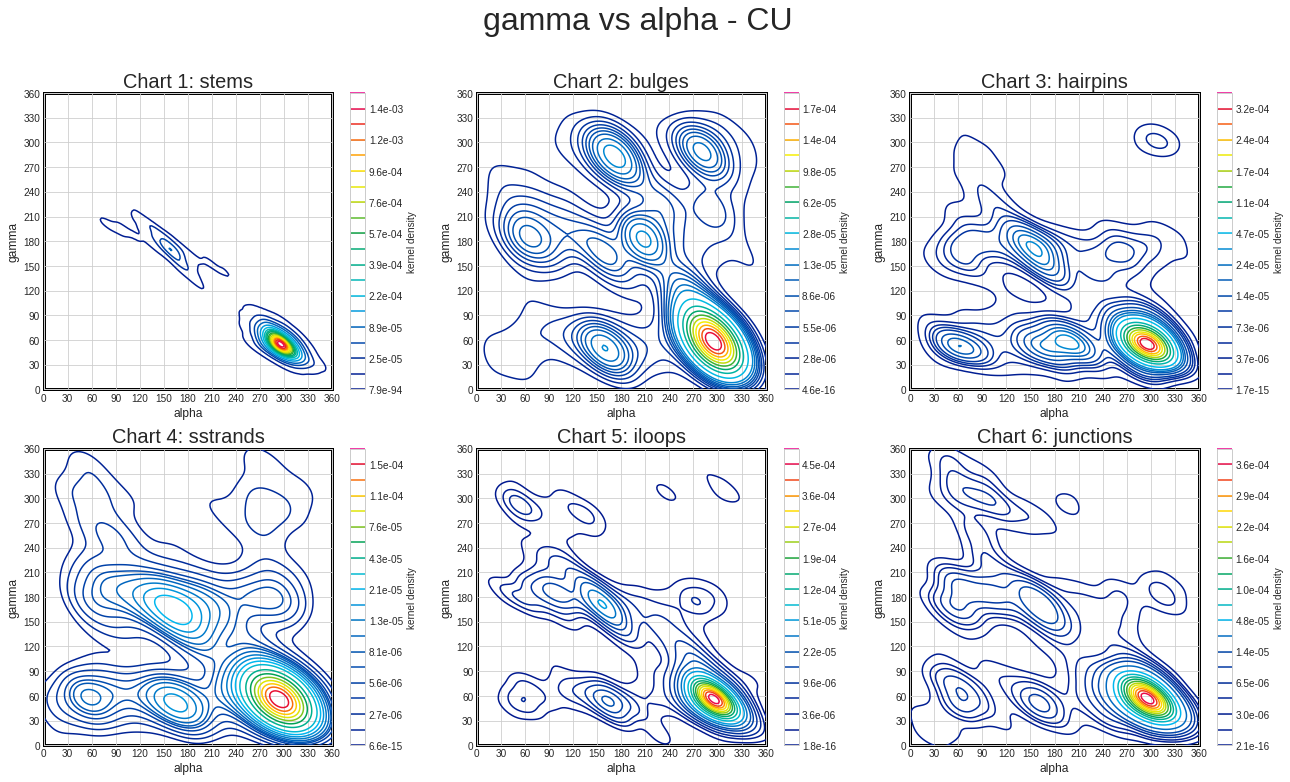

In [18]:
t_start = datetime.datetime.now()


dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]

counter=0
for filepath in glob.iglob('/mnt/rna/home/nkumarachchi2019/scratch/project_dimer_extraction/2dplots_2d_data/alpha/2d_*.dat'):
#for filepath in glob.iglob('/mnt/rna/home/nkumarachchi2019/scratch/project_dimer_extraction/2dplots_2d_data/XXXXX/x2d_*'):
#/
  
  print(filepath)
  df= pd.read_csv(filepath, header = None, delim_whitespace=True,)

  a=re.split(';|\.|/| |,|_|\t+| +|\*|\n',filepath)
  print(a)
  xname=a[15]
  yname=a[16] 
  dimername=a[17]
  print(xname,yname,dimername)

  plt.style.use("seaborn-whitegrid")
  plt.figure(figsize=(22,12))

  for i in range(0,6):
  #/ 
    plt.subplot(2,3,i+1)
    ax = sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=False, thresh=0, levels=20, cmap=custom_ramp, common_norm=True, cbar=True, cbar_kws={'format': '%2.1e', 'label': 'kernel density'} )
    plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)
    plt.xlabel(str(xname), fontsize=12)
    plt.ylabel(str(yname), fontsize=12)
    plt.xlim([0, 360])
    plt.ylim([0, 360])
    ax.set_yticks(np.arange(0,361,30))
    ax.set_xticks(np.arange(0,361,30))
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('3')  
    #plt.setp(ax, xlim=(0, 360), ylim=(0, 360))
  #/
  plt.suptitle(str(yname)+' vs '+str(xname)+' - '+str(dimername), size=32)

  plt.savefig('/mnt/rna/home/nkumarachchi2019/scratch/project_dimer_extraction/2dplots_2d_data/plots/alpha/'+str(xname)+'_'+str(yname)+'_'+str(dimername), bbox_inches='tight', dpi=300 )
    
  counter+=1
  print(counter)

#/



t_end = datetime.datetime.now()
elapsedTime = (t_end - t_start )

print(elapsedTime.total_seconds())